<img src='logo.jpg'>

## RNN Exercise
### Time Series Perediction
### Neural Network Course (Dr.Azadeh Mansouri)
### Kharazmi University 
### Department of computer and electrical engineering


### ---------------------------------------------------------------------

### Ali Forghani Elah Abadi
### Student Number : 973082512 

In [0]:
#import packages

import tensorflow as tf     
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import sklearn as sk
from sklearn import preprocessing as ppr

In [0]:
#connect google drive to google colabratory

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
#generate data from dataset csv file 

dataFrame = pd.read_csv('/content/drive/My Drive/Colab Notebooks/RNN/airline-passengers.csv', usecols = [1], header = 0)[:-1]
dataset_orig = dataFrame.values.astype(np.float32)

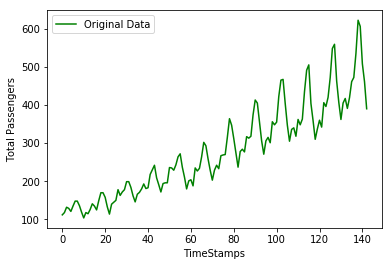

In [0]:
#plot raw data

plt.plot(dataset_orig, label = "Original Data", c = 'g')
plt.legend()
plt.xlabel('TimeStamps')
plt.ylabel("Total Passengers")
plt.show()

In [0]:
# normalize the dataset
scaler = ppr.MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset_orig)

In [0]:
#function definition to splitting data to train and test

def train_test_set(dataset, percentage_train = 0.75):
    l = len(dataset)
    train_set_end_index = int(l * 0.67)
    test_set_start_index = train_set_end_index + 1
    train_set = dataset[:test_set_start_index]
    test_set = dataset[test_set_start_index:]
    return train_set, test_set

def supervised_learning_form(train_dataset, test_dataset):
    train_x = train_dataset[:-1]
    train_y = train_dataset[1:]
    test_x = test_dataset[:-1]
    test_y = test_dataset[1:]
    return train_x, train_y, test_x, test_y

In [0]:
#splitting data to train and test
train_set, test_set = train_test_set(dataset)
train_x, train_y, test_x, test_y = supervised_learning_form(train_set, test_set)

In [0]:
# network parameters

net_size = 20
n_epochs = 2000
n_x = 1
n_y = 1
n_timestamp = n_x
n_x_vars = 1
n_y_vars = 1
learning_rate = 0.08

In [0]:
tf.reset_default_graph()

In [0]:
# input and output placeholders
X_p = tf.placeholder(tf.float32, [None, n_timestamp, n_x_vars], name = "X_input")
Y_p = tf.placeholder(tf.float32, [None, n_timestamp, n_y_vars], name = "Y_output")

rnn_inputs = tf.unstack(X_p, axis = 1)

# setup the RNN
with tf.name_scope("RNN"):
    rnnCell = tf.nn.rnn_cell.LSTMCell(net_size, name = "rnn_cell")
    rnn_outputs, final_state = tf.nn.static_rnn(rnnCell, rnn_inputs, dtype=tf.float32)

    # weights and biases

    W = tf.get_variable('W', [net_size, n_y_vars])
    b = tf.get_variable('b', [n_y_vars], initializer=tf.constant_initializer(0.0))

W0627 15:08:23.509525 139644203726720 deprecation.py:323] From <ipython-input-10-8b5adadc92e4>:8: LSTMCell.__init__ (from tensorflow.python.ops.rnn_cell_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
W0627 15:08:23.511293 139644203726720 deprecation.py:323] From <ipython-input-10-8b5adadc92e4>:9: static_rnn (from tensorflow.python.ops.rnn) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
W0627 15:08:23.537526 139644203726720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argu

In [0]:
# run predictions
predictions = [tf.matmul(rnn_output, W) + b for rnn_output in rnn_outputs]

In [0]:
y_as_list = tf.unstack(Y_p, num = n_timestamp, axis = 1)

In [0]:
#set mean square loss

losses = [tf.losses.mean_squared_error(labels = label, predictions = prediction) 
          for prediction, label in zip(predictions, y_as_list)]
total_loss = tf.reduce_mean(losses)
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(total_loss)

W0627 15:23:17.632296 139644203726720 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/losses/losses_impl.py:121: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0627 15:23:17.755704 139644203726720 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/adagrad.py:76: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
#training with run session in loop

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    epoch_loss = 0.0
    
    # tensorboard
    writer = tf.summary.FileWriter('./log', sess.graph)
    # training
    
    for epoch in range(n_epochs):
        
        # first loss, then predict, then run optimizer till n_epochs
        
        
        
        epoch_loss, y_train_prediction,_ = sess.run([total_loss, predictions, optimizer], 
                 feed_dict = { X_p : train_x.reshape(-1, n_timestamp, n_x_vars), 
                              Y_p : train_y.reshape(-1, n_timestamp, n_y_vars) })
        
        if epoch % 100 == 0:
            print("Loss after epoch " + str(epoch) + " : " + str(epoch_loss))
        
    print("Training mse :" + str(epoch_loss))
    
    #testing
    
    test_loss, y_test_prediction, _ = sess.run([total_loss, predictions, optimizer],
                  feed_dict = { X_p : test_x.reshape(-1, n_timestamp, n_x_vars), 
                                Y_p : test_y.reshape(-1, n_timestamp, n_y_vars) })
    print("Testing mse :" + str(test_loss))

Loss after epoch 0 : 0.06099968
Loss after epoch 100 : 0.013109326
Loss after epoch 200 : 0.009432044
Loss after epoch 300 : 0.0064909225
Loss after epoch 400 : 0.0043991427
Loss after epoch 500 : 0.0031226855
Loss after epoch 600 : 0.0024542366
Loss after epoch 700 : 0.0021469137
Loss after epoch 800 : 0.002018876
Loss after epoch 900 : 0.001969046
Loss after epoch 1000 : 0.0019504812
Loss after epoch 1100 : 0.0019437341
Loss after epoch 1200 : 0.0019413007
Loss after epoch 1300 : 0.0019404085
Loss after epoch 1400 : 0.0019400612
Loss after epoch 1500 : 0.0019399041
Loss after epoch 1600 : 0.0019398141
Loss after epoch 1700 : 0.0019397469
Loss after epoch 1800 : 0.0019396881
Loss after epoch 1900 : 0.0019396327
Training mse :0.0019395789
Testing mse :0.008976447


In [0]:

y_train_prediction = scaler.inverse_transform(y_train_prediction[0])
y_test_prediction = scaler.inverse_transform(y_test_prediction[0])

In [0]:

y_train_orig = scaler.inverse_transform(train_y)

In [0]:

y_test_orig = scaler.inverse_transform(test_y)

In [0]:
y_test_prediction_shifted = np.empty_like(dataset_orig)
y_test_prediction_shifted[:len(y_train_orig) + 1] = np.nan
y_test_prediction_shifted[len(y_train_orig) + 1:-1] = y_test_prediction
y_test_prediction_shifted[-1] = np.nan

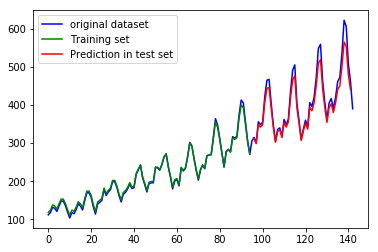

In [0]:
plt.plot(dataset_orig, label = "original dataset", c = 'b')
plt.plot(y_train_prediction, label = "Training set", c = 'g')
plt.plot(y_test_prediction_shifted, label = "Prediction in test set", c = 'r')
plt.legend()
plt.show()

## Report 

<p dir = 'rtl' style="text-align:right;">  
   به عنوان گزارش خلاصه ای از روند اجرا شده در بالا باید گفت پس از دریافت فایل دیتا ست از گوگل درایو آن را لود نموده و داده ها را طوری به دو مجموعه آموزش و تست تجزیه میکنیم که هر برچسب به ازای هر داده آموزشی نشانه تعداد مسافرین در ماه بعدی آن داده است . سپس با ست کردن هایپر پارامتر های شبکه و پس از آن ایجاد پلیس هولدر هایی به عنوان مکان خالی برای متغیر های هر بچ داده که قرار است به طور موازی محاسبه شوند تعریف میشود. بعد از آن با تعریف یک سلول شبکه ریکارنت و پیکر بندی آن و همچنین تنظیم تابع خطا بر روی میانگین مربعات خطا و دستور مینیمایز کردن آن در حلقه ای هر بار یک سشن ران میکنیم و در طی آن فرآیند آموزش را به انجام میرسانیم . در نهایت خروجی مشاهده شده بیانگر پیش بینی انجام شده ما روی داده های تست خواهد بود. 
</p>